In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [4]:
df['EstimatedSalary'].fillna((df['EstimatedSalary'].mean()), inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [5]:
df.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.rename(columns={'CredRate': 'CreditScore', 
                   'ActMem': 'IsActiveMember',
                   'Prod Number': 'NumOfProducts',
                   'Exited': 'Churn'}, inplace=True)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [7]:
#刪除CustomerId 欄位
df = df.drop(['CustomerId'], axis = 1)

In [8]:
#將Geography、Gender、HasCrCard、 Churn、IsActiveMember 修改資料型態為 category
df['Geography'] = df.Geography.astype('category')
df['Gender'] = df.Gender.astype('category')
df['HasCrCard'] = df.HasCrCard.astype('category')
df['Churn'] = df.Churn.astype('category')
df['IsActiveMember'] = df.IsActiveMember.astype('category')
df.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [10]:
# 存成新的 CSV 檔
df.to_csv("Churn_Modelling_new.csv", index=False)

In [11]:
df.groupby(['HasCrCard']).size()

HasCrCard
0    2945
1    7055
dtype: int64

In [12]:
print('持有信用卡的人數比例 :', 7055/(2945+7055))
print('未持有信用卡的人數比例 :', 2945/(2945+7055))

持有信用卡的人數比例 : 0.7055
未持有信用卡的人數比例 : 0.2945


In [13]:
df.groupby(['Churn']).size()

# 0 = 未流失， 1 = 流失

Churn
0    7963
1    2037
dtype: int64

In [14]:
print('客戶流失比例 :', 2037/(2037+7963))

客戶流失比例 : 0.2037


In [15]:
df.groupby(['IsActiveMember']).size()

IsActiveMember
0    4849
1    5151
dtype: int64

In [16]:
print('客戶活躍比例 :', 5151/(5151+4849))

客戶活躍比例 : 0.5151


In [26]:
import copy

churn_1 = copy.deepcopy(df[df['Churn'].isin([1])])
churn_1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531
std,100.321503,9.761562,2.936106,58360.794816,0.801521,57912.418071
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,51907.720000
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,102460.840000
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,152422.910000
max,850.000000,84.000000,10.000000,250898.090000,4.000000,199808.100000


In [18]:
churn_0 = copy.deepcopy(df[df['Churn'].isin([0])])
churn_0.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000
mean,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.932023
std,95.653837,10.123714,2.880658,62848.040701,0.509536,57397.636600
min,405.000000,18.000000,0.000000,0.000000,1.000000,90.070000
25%,585.000000,31.000000,3.000000,0.000000,1.000000,50783.490000
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,99645.040000
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,148596.500000
max,850.000000,92.000000,10.000000,221532.800000,3.000000,199992.480000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

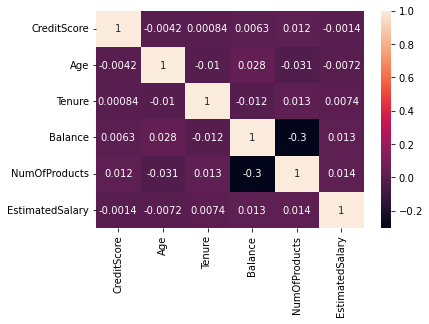

In [20]:
corrM = df.corr() 
sns.heatmap(corrM, annot = True)

In [21]:
churn = copy.deepcopy(df['Churn'])
churn = churn.replace(to_replace = [0, 1], value = ['No Churn', 'Churn']) 

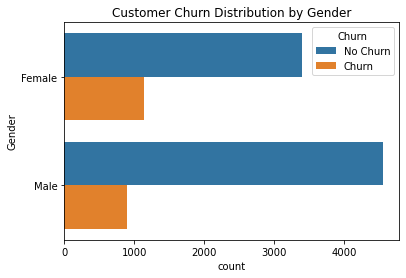

In [22]:
sns.countplot(y = df['Gender'], hue = churn)
plt.title('Customer Churn Distribution by Gender')
plt.show()

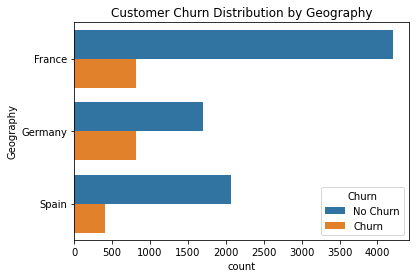

In [23]:
sns.countplot(y = df['Geography'], hue = churn)
plt.title('Customer Churn Distribution by Geography')
plt.show()

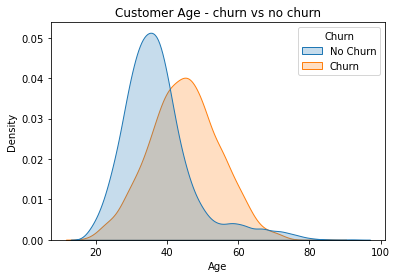

In [24]:
# common_norm=False  => 區域下的面積總和分別等於一

sns.kdeplot(x = df['Age'],  hue = churn , fill=True, common_norm=False)
plt.title('Customer Age - churn vs no churn')
plt.show()

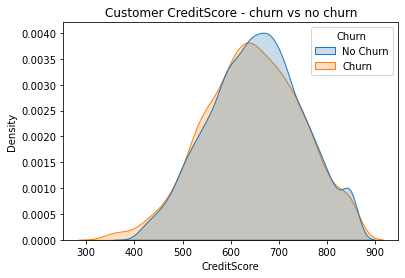

In [25]:
sns.kdeplot(x = df['CreditScore'],  hue = churn , fill=True, common_norm=False)
plt.title('Customer CreditScore - churn vs no churn')
plt.show()